Python code to implement an Artificial Neural Network (ANN) for a regression problem using a dataset that is readily available in Python. 
We'll use the famous Boston Housing Prices dataset from the scikit-learn library as an example. 
This dataset contains features related to housing in Boston and the target variable is the median value of owner-occupied homes. 
The goal is to predict house prices based on these features.

Import Libraries: First, you need to import the necessary libraries, including scikit-learn, NumPy, and Keras.
    "NumPy and pandas for data manipulation, scikit-learn for dataset loading and preprocessing, and Keras for building and training the neural network model."

In [3]:
pip install --upgrade scikit-learn


     ---------------------------------------- 9.3/9.3 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\PREETI\\anaconda3\\envs\\DeepLearning\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

In [7]:
# Fetch the Boston Housing Prices dataset from scikit-learn
data = fetch_openml(name="boston", version=1, parser='auto')

# Create a DataFrame from the dataset
boston_df = pd.DataFrame(data.data, columns=data.feature_names)
boston_df['PRICE'] = data.target



CRIM: Per capita crime rate by town (measured as a floating-point number).

ZN: Proportion of residential land zoned for large lots (measured as a floating-point number).

INDUS: Proportion of non-retail business acres per town (measured as a floating-point number).

CHAS: Charles River dummy variable (categorical, typically 0 or 1, indicating whether the tract bounds the river).

NOX: Nitrogen oxide concentration (measured as a floating-point number).

RM: Average number of rooms per dwelling (measured as a floating-point number).

AGE: Proportion of owner-occupied units built before 1940 (measured as a floating-point number).

DIS: Weighted distance to employment centers (measured as a floating-point number).

RAD: Index of accessibility to radial highways (categorical, typically values ranging from 1 to 24).

TAX: Property tax rate (measured as a floating-point number).

PTRATIO: Pupil-teacher ratio (measured as a floating-point number).

B: Proportion of residents of African American descent (measured as a floating-point number).

LSTAT: Percentage of lower status population (measured as a floating-point number).

PRICE: Median value of owner-occupied homes (the target variable you're trying to predict, measured as a floating-point number).

In [18]:
# Display basic information about the dataset
print("Number of Samples:", boston_df.shape[0])
print("Number of Features:", boston_df.shape[1] - 1)  # Excluding the target variable
print("\nColumn Names:\n", boston_df.columns)
print("\nData Types:\n", boston_df.dtypes)
print("\nSummary Statistics:\n", boston_df.describe())

# Show the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:\n", boston_df.head())

Number of Samples: 506
Number of Features: 13

Column Names:
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

Data Types:
 CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
PRICE       float64
dtype: object

Summary Statistics:
              CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.8

In [8]:
# Split the data into features (X) and target (y)
X = boston_df.drop(columns='PRICE')
y = boston_df['PRICE']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
13/13 [==============================] - 0s 6ms/step - loss: 8.1544 - mae: 2.0983 - val_loss: 12.3549 - val_mae: 2.4024
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 8.1665 - mae: 2.0919 - val_loss: 12.2871 - val_mae: 2.3956
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 8.0864 - mae: 2.0798 - val_loss: 12.3390 - val_mae: 2.3827
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 8.0369 - mae: 2.0754 - val_loss: 12.2179 - val_mae: 2.3704
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 7.9759 - mae: 2.0705 - val_loss: 12.2952 - val_mae: 2.3904
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 8.0141 - mae: 2.0725 - val_loss: 12.2968 - val_mae: 2.3861
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 7.9355 - mae: 2.0677 - val_loss: 12.3334 - val_mae: 2.4144
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 7.8

13/13 [==============================] - 0s 4ms/step - loss: 5.8219 - mae: 1.7984 - val_loss: 11.6566 - val_mae: 2.2695
Epoch 63/100
13/13 [==============================] - 0s 4ms/step - loss: 5.7819 - mae: 1.7988 - val_loss: 11.5318 - val_mae: 2.2697
Epoch 64/100
13/13 [==============================] - 0s 4ms/step - loss: 5.7693 - mae: 1.7884 - val_loss: 11.5737 - val_mae: 2.2733
Epoch 65/100
13/13 [==============================] - 0s 4ms/step - loss: 5.7463 - mae: 1.7965 - val_loss: 11.5555 - val_mae: 2.2610
Epoch 66/100
13/13 [==============================] - 0s 4ms/step - loss: 5.6410 - mae: 1.7625 - val_loss: 11.4532 - val_mae: 2.2490
Epoch 67/100
13/13 [==============================] - 0s 4ms/step - loss: 5.7436 - mae: 1.7941 - val_loss: 11.6568 - val_mae: 2.2752
Epoch 68/100
13/13 [==============================] - 0s 4ms/step - loss: 5.6152 - mae: 1.7696 - val_loss: 11.4609 - val_mae: 2.2500
Epoch 69/100
13/13 [==============================] - 0s 4ms/step - loss: 5.5530 -

 In regression, we often use metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2) to evaluate how well the model predicts continuous values.

In [15]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 2.21


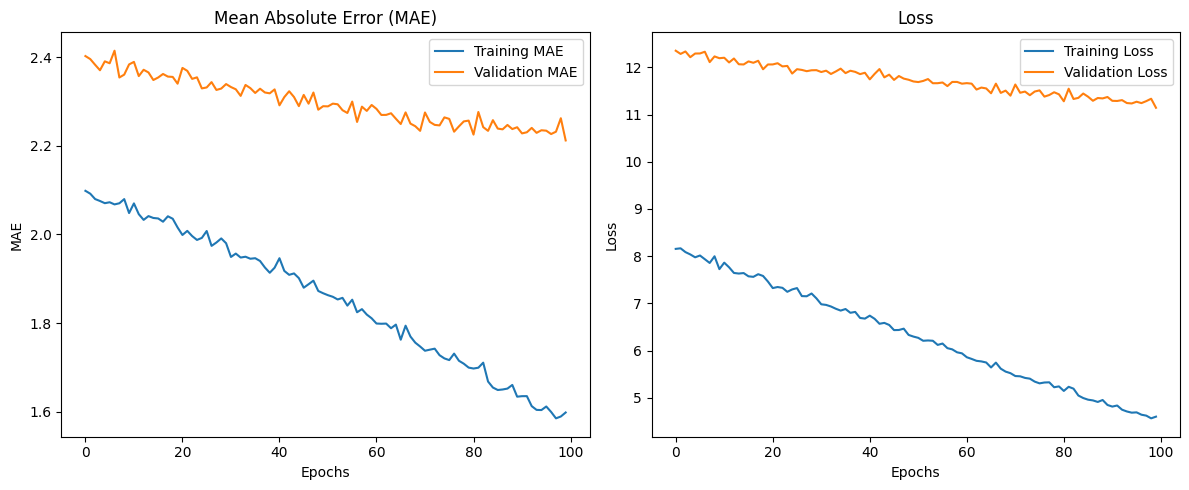

In [17]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))
# Plot Mean Absolute Error (MAE)
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()